In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt  
import pickle 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')


In [2]:
df = pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
df.shape

(768, 9)

In [4]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [5]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

### The data has no missing value

In [6]:
df.nlargest(10,'Age')

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
459,9,134,74,33,60,25.9,0.460,81,0
453,2,119,0,0,0,19.6,0.832,72,0
666,4,145,82,18,0,32.5,0.235,70,1
123,5,132,80,0,0,26.8,0.186,69,0
684,5,136,82,0,0,0.0,0.640,69,0
674,8,91,82,0,0,35.6,0.587,68,0
363,4,146,78,0,0,38.5,0.520,67,1
489,8,194,80,0,0,26.1,0.551,67,0
537,0,57,60,0,0,21.7,0.735,67,0
221,2,158,90,0,0,31.6,0.805,66,1


## The first 10 with heightest age are within (81-66)

In [7]:
df.nsmallest(10,'Age')

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
3,1,89,66,23,94,28.1,0.167,21,0
55,1,73,50,10,0,23.0,0.248,21,0
60,2,84,0,0,0,0.0,0.304,21,0
90,1,80,55,0,0,19.1,0.258,21,0
94,2,142,82,18,64,24.7,0.761,21,0
102,0,125,96,0,0,22.5,0.262,21,0
105,1,126,56,29,152,28.7,0.801,21,0
119,4,99,76,15,51,23.2,0.223,21,0
136,0,100,70,26,50,30.8,0.597,21,0
145,0,102,75,23,0,0.0,0.572,21,0


## This show the smallest age from the dataset is 21

In [8]:
df['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

# 0 - non diabetic
# 1 - diabetic

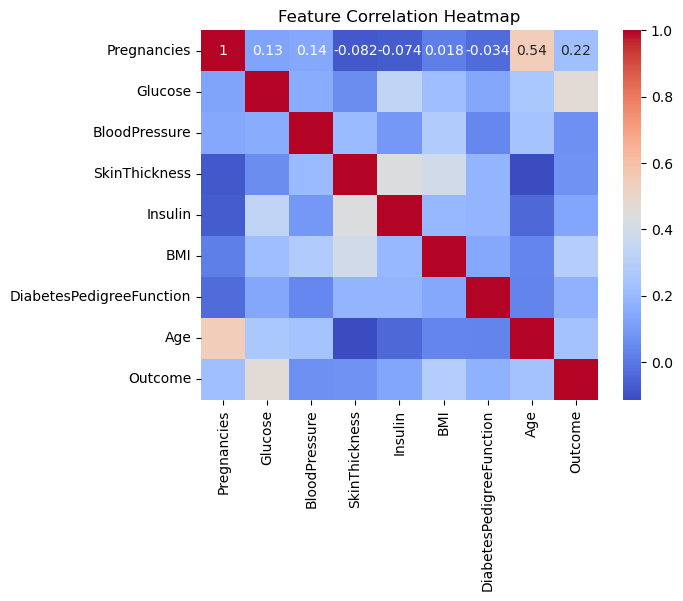

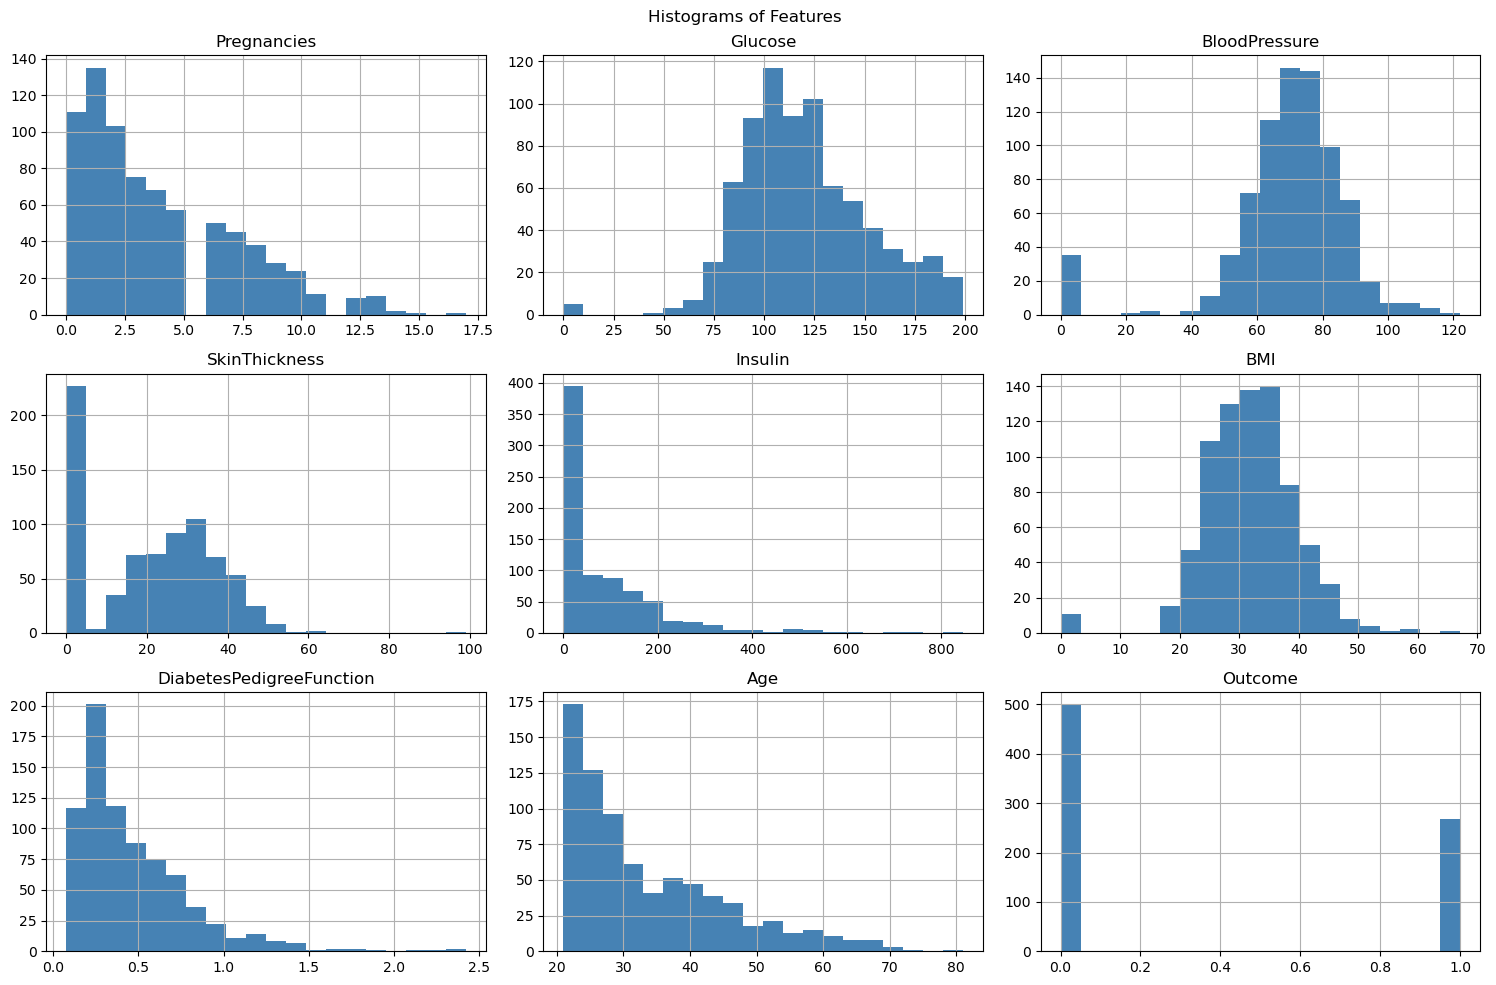

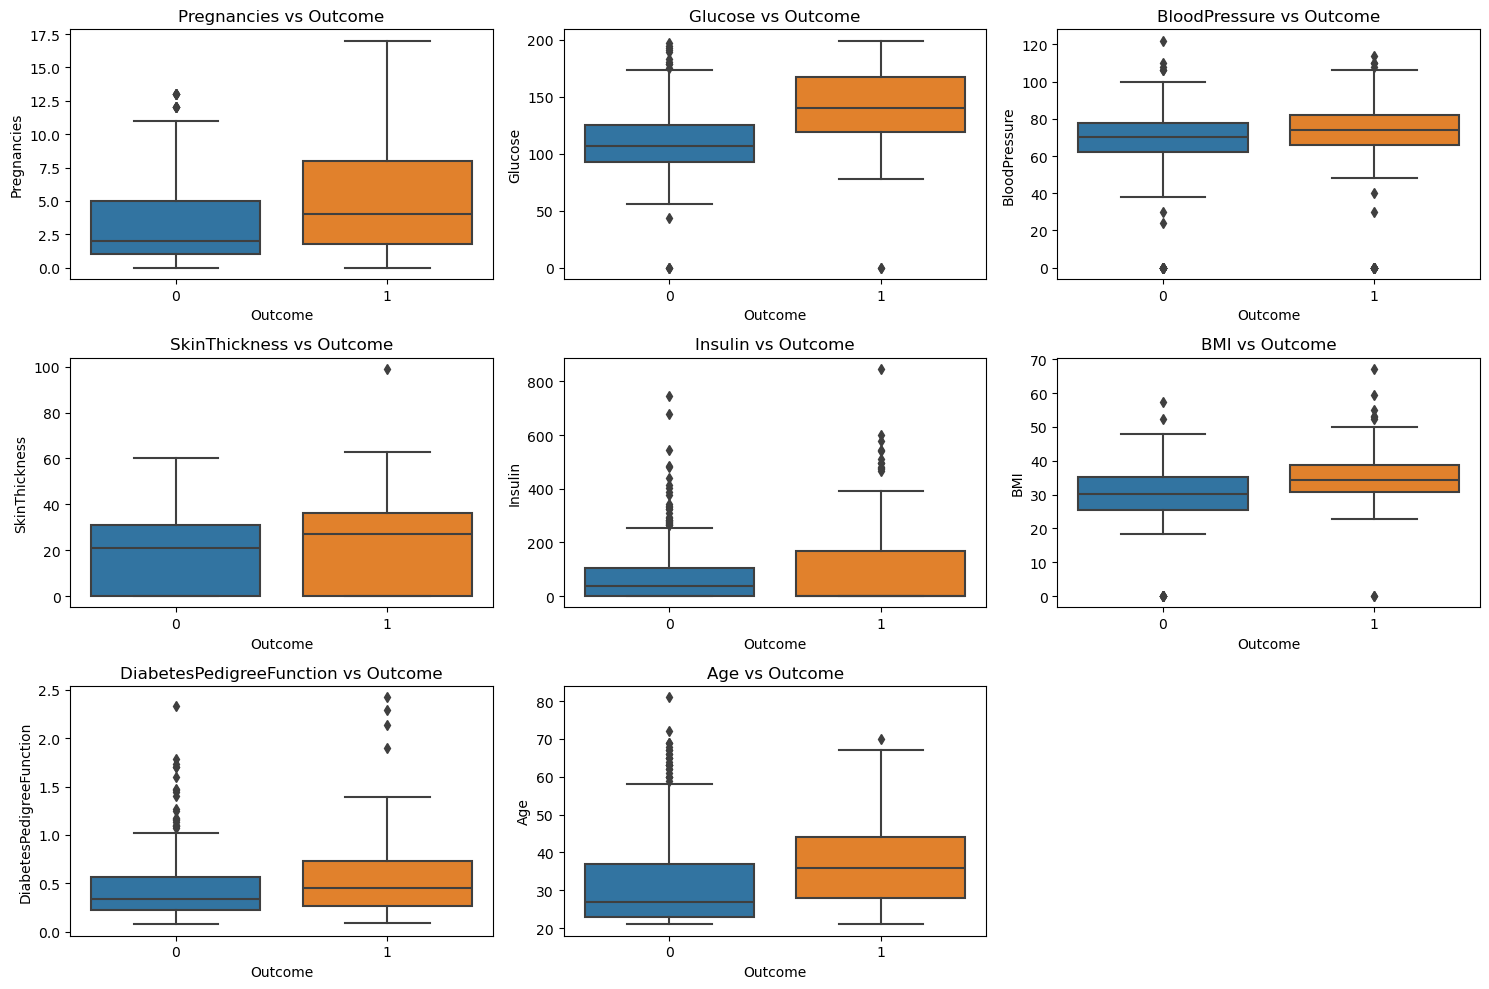

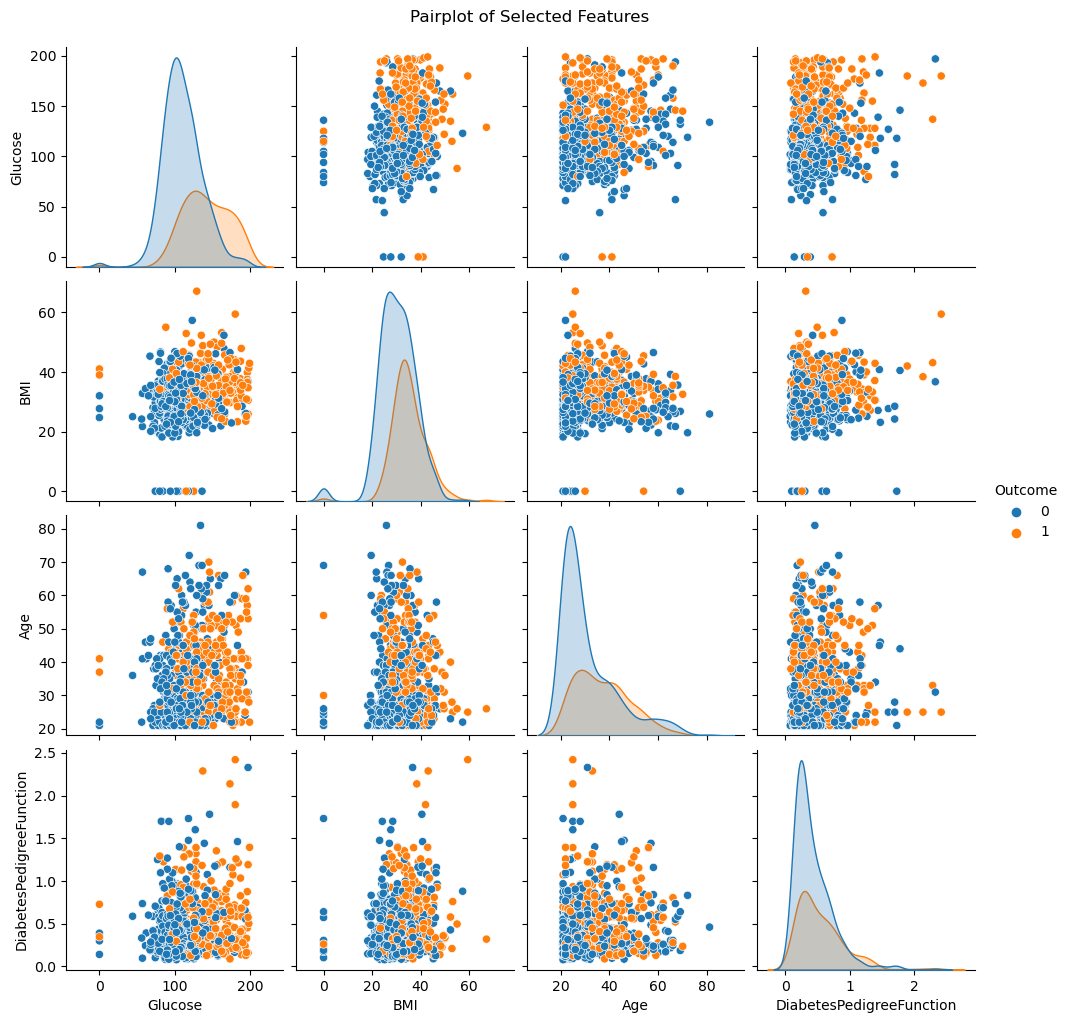

In [22]:
# Correlation heatmap
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()

# Distribution plots for all numerical features
df.hist(bins=20, figsize=(15, 10), color='steelblue')
plt.suptitle('Histograms of Features')
plt.tight_layout()
plt.show()

# Box plots to check for outliers
plt.figure(figsize=(15, 10))
for i, col in enumerate(df.columns[:-1]):
    plt.subplot(3, 3, i+1)
    sns.boxplot(data=df, y=col, x='Outcome')
    plt.title(f'{col} vs Outcome')
plt.tight_layout()
plt.show()

# Pairplot for selected features
sns.pairplot(df[['Glucose', 'BMI', 'Age', 'DiabetesPedigreeFunction', 'Outcome']], hue='Outcome')
plt.suptitle('Pairplot of Selected Features', y=1.02)
plt.show()

In [10]:
X = df.drop('Outcome', axis=1)
y = df['Outcome']

In [11]:
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [12]:
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [13]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
models = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'Logistic Regression': LogisticRegression(max_iter=1000, solver='liblinear'),
    'Decision Tree': DecisionTreeClassifier(random_state=42)
}

best_model = None
best_accuracy = 0

for name, model in models.items():
    try:
        model.fit(X_train, y_train)
        train_accuracy = accuracy_score(y_train, model.predict(X_train))
        test_accuracy = accuracy_score(y_test, model.predict(X_test))
        print(f"{name} Train Accuracy: {train_accuracy * 100:.2f}%")
        print(f"{name} Test Accuracy: {test_accuracy * 100:.2f}%\n")
        if test_accuracy > best_accuracy:
            best_accuracy = test_accuracy
            best_model = model
    except Exception as e:
        print(f"Error training {name}: {e}")

Random Forest Train Accuracy: 100.00%
Random Forest Test Accuracy: 72.08%

Gradient Boosting Train Accuracy: 93.81%
Gradient Boosting Test Accuracy: 74.03%

Logistic Regression Train Accuracy: 77.04%
Logistic Regression Test Accuracy: 75.97%

Decision Tree Train Accuracy: 100.00%
Decision Tree Test Accuracy: 74.68%



In [15]:
final_predictions = best_model.predict(X_test)
print("\nSelected Best Model Test Accuracy:", best_accuracy * 100)





Selected Best Model Test Accuracy: 75.97402597402598


## Logistic Regression has the highest Test accuracy of 75.97% 

In [16]:
with open('diabetes_model.pkl', 'wb') as file:
    pickle.dump(best_model, file)

In [21]:
sample_data = np.array([[1,103,30,38,83,43.3,0.183,33]])
if (best_model.predict(sample_data)[0]==0):
    print("Person is not diabetic")
else:
    print("Person is diabetic")

Person is not diabetic
